<a href="https://colab.research.google.com/github/sharkawy98/data_analysis/blob/main/advanced_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Doing some advanced visualiztions with seaborn library 

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/datasets/Movie-Ratings.csv')
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
movies.columns = ['film', 'genre', 'rotten_rate', 'audience_rate', 'budget_million', 'year']

In [ ]:
movies.genre.unique()

array(['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance',
       'Thriller'], dtype=object)

In [ ]:
movies.film = movies.film.astype('category')
movies.genre = movies.genre.astype('category')
movies.year = movies.year.astype('category')

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   film            559 non-null    category
 1   genre           559 non-null    category
 2   rotten_rate     559 non-null    int64   
 3   audience_rate   559 non-null    int64   
 4   budget_million  559 non-null    int64   
 5   year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


---
# Advanced Visualizations & Plots

### JoinPlots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

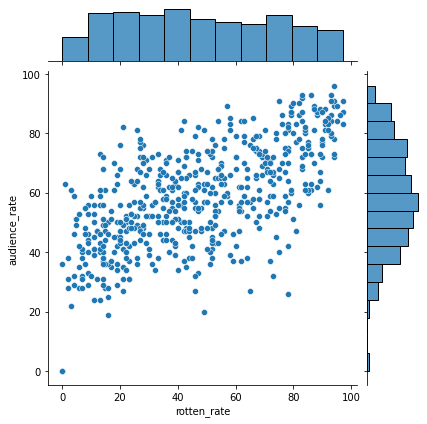

In [ ]:
sns.jointplot(data=movies, x='rotten_rate', y='audience_rate')

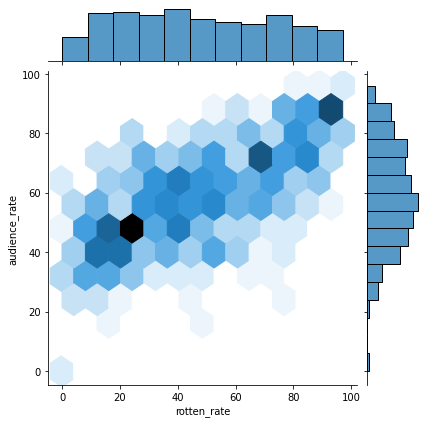

In [ ]:
sns.jointplot(data=movies, x='rotten_rate', y='audience_rate', kind='hex')

### Histograms

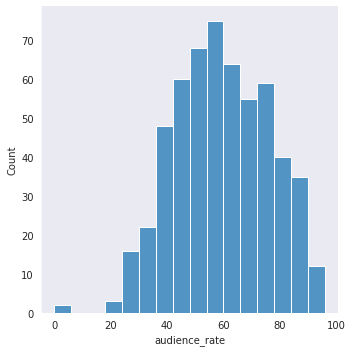

In [ ]:
sns.set_style(style='dark')
sns.displot(movies.audience_rate)

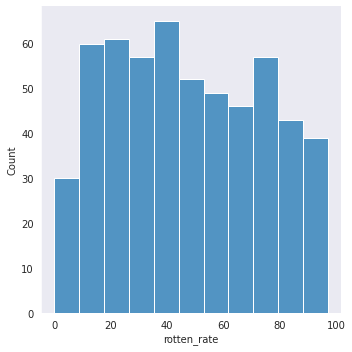

In [ ]:
sns.displot(movies.rotten_rate)

### Stacked histograms

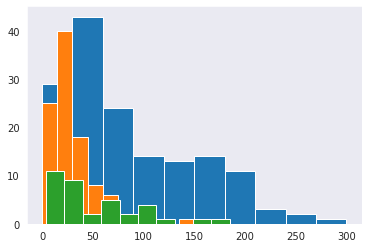

In [ ]:
plt.hist(movies[movies.genre == 'Action'].budget_million)
plt.hist(movies[movies.genre == 'Drama'].budget_million)
plt.hist(movies[movies.genre == 'Thriller'].budget_million)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


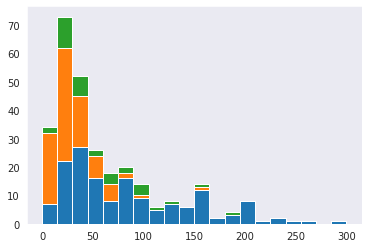

In [ ]:
plt.hist([
    movies[movies.genre == 'Action'].budget_million,
    movies[movies.genre == 'Drama'].budget_million,
    movies[movies.genre == 'Thriller'].budget_million
], bins=20, stacked=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


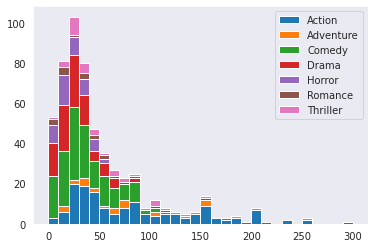

In [ ]:
list_ = []
labels = []
for gen in movies.genre.cat.categories:
    list_.append(movies[movies.genre == gen].budget_million)
    labels.append(gen)

plt.hist(list_, bins=30, stacked=True, label=labels)
plt.legend()
plt.show()

### KDE plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


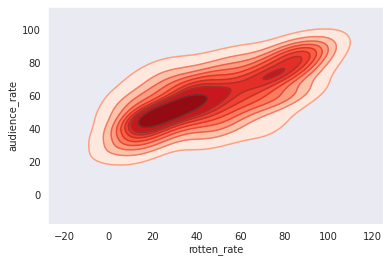

In [ ]:
sns.kdeplot(movies.rotten_rate, movies.audience_rate, shade=True, shade_lowest=False, cmap='Reds')
sns.kdeplot(movies.rotten_rate, movies.audience_rate, cmap='Reds_d')  # better quality

### SubPlots(): combine plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


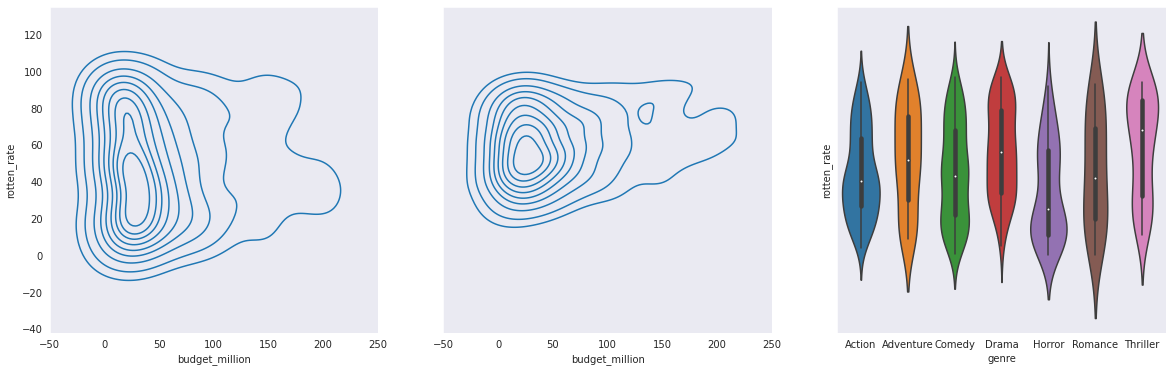

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,6), sharey=True)
k1 = sns.kdeplot(movies.budget_million, movies.rotten_rate, ax=axes[0])
k2 = sns.kdeplot(movies.budget_million, movies.audience_rate, ax=axes[1])
v = sns.violinplot(data=movies, x='genre', y='rotten_rate')

k1.set(xlim=(-50, 250))
k2.set(xlim=(-50, 250))
plt.show()

### Facet grids

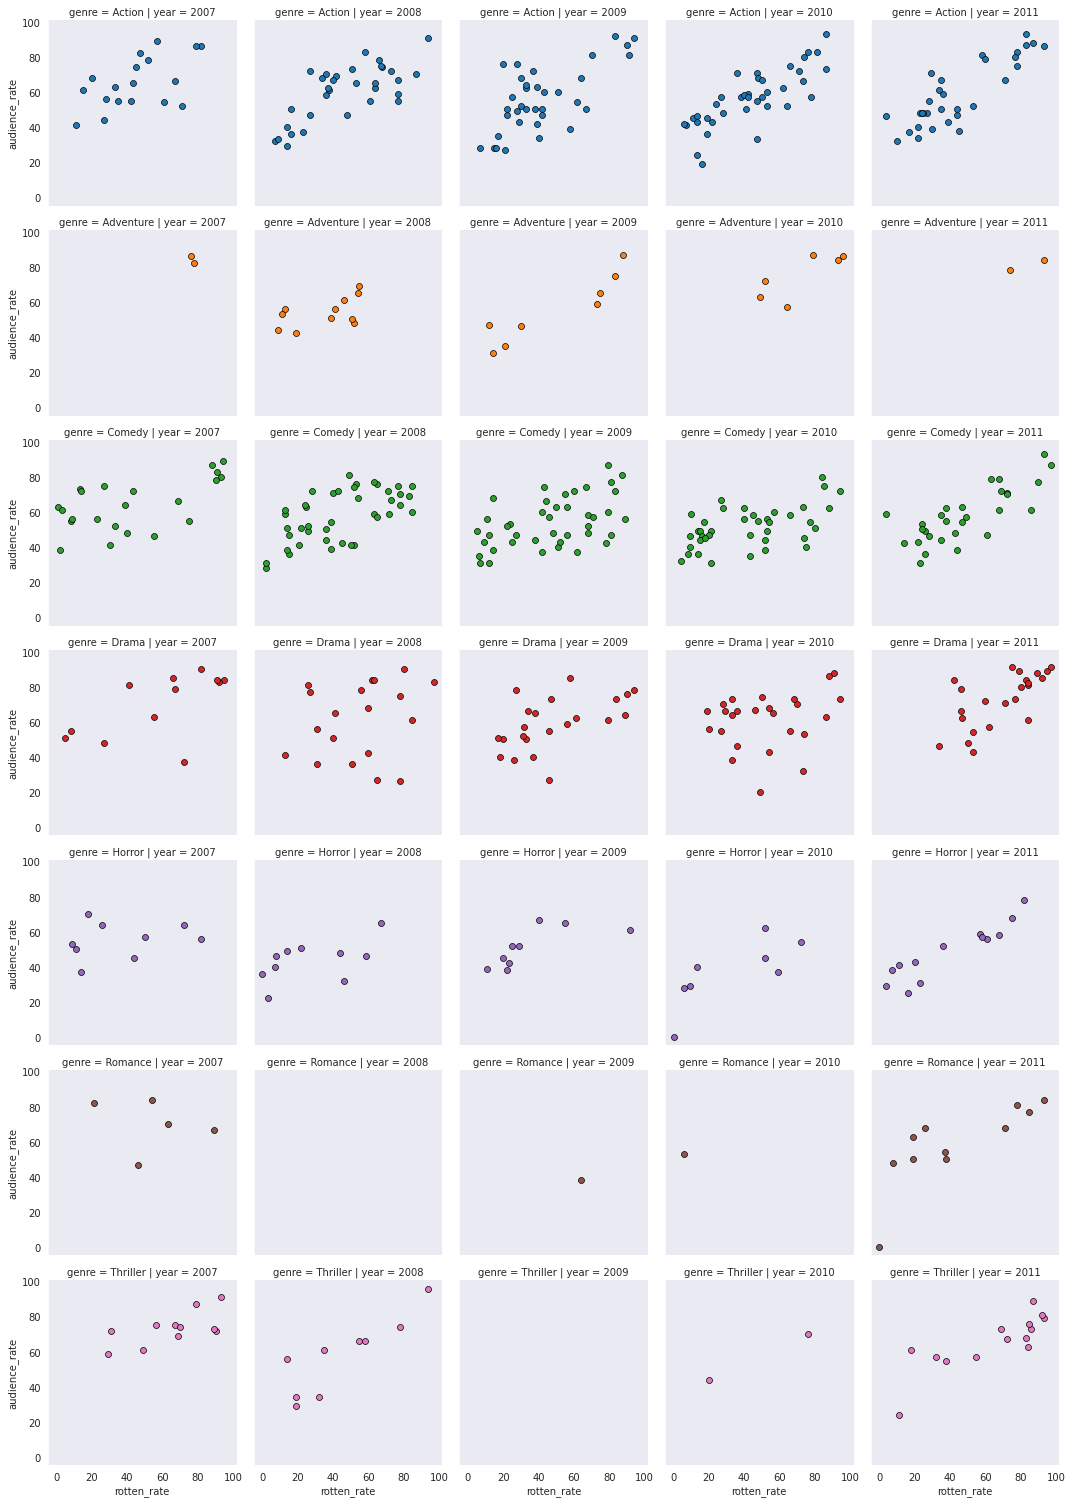

In [ ]:
fg = sns.FacetGrid(movies, row='genre', col='year', hue='genre')
fg = fg.map(plt.scatter, 'rotten_rate', 'audience_rate', **{'edgecolor': 'black', 'linewidth': 0.7})

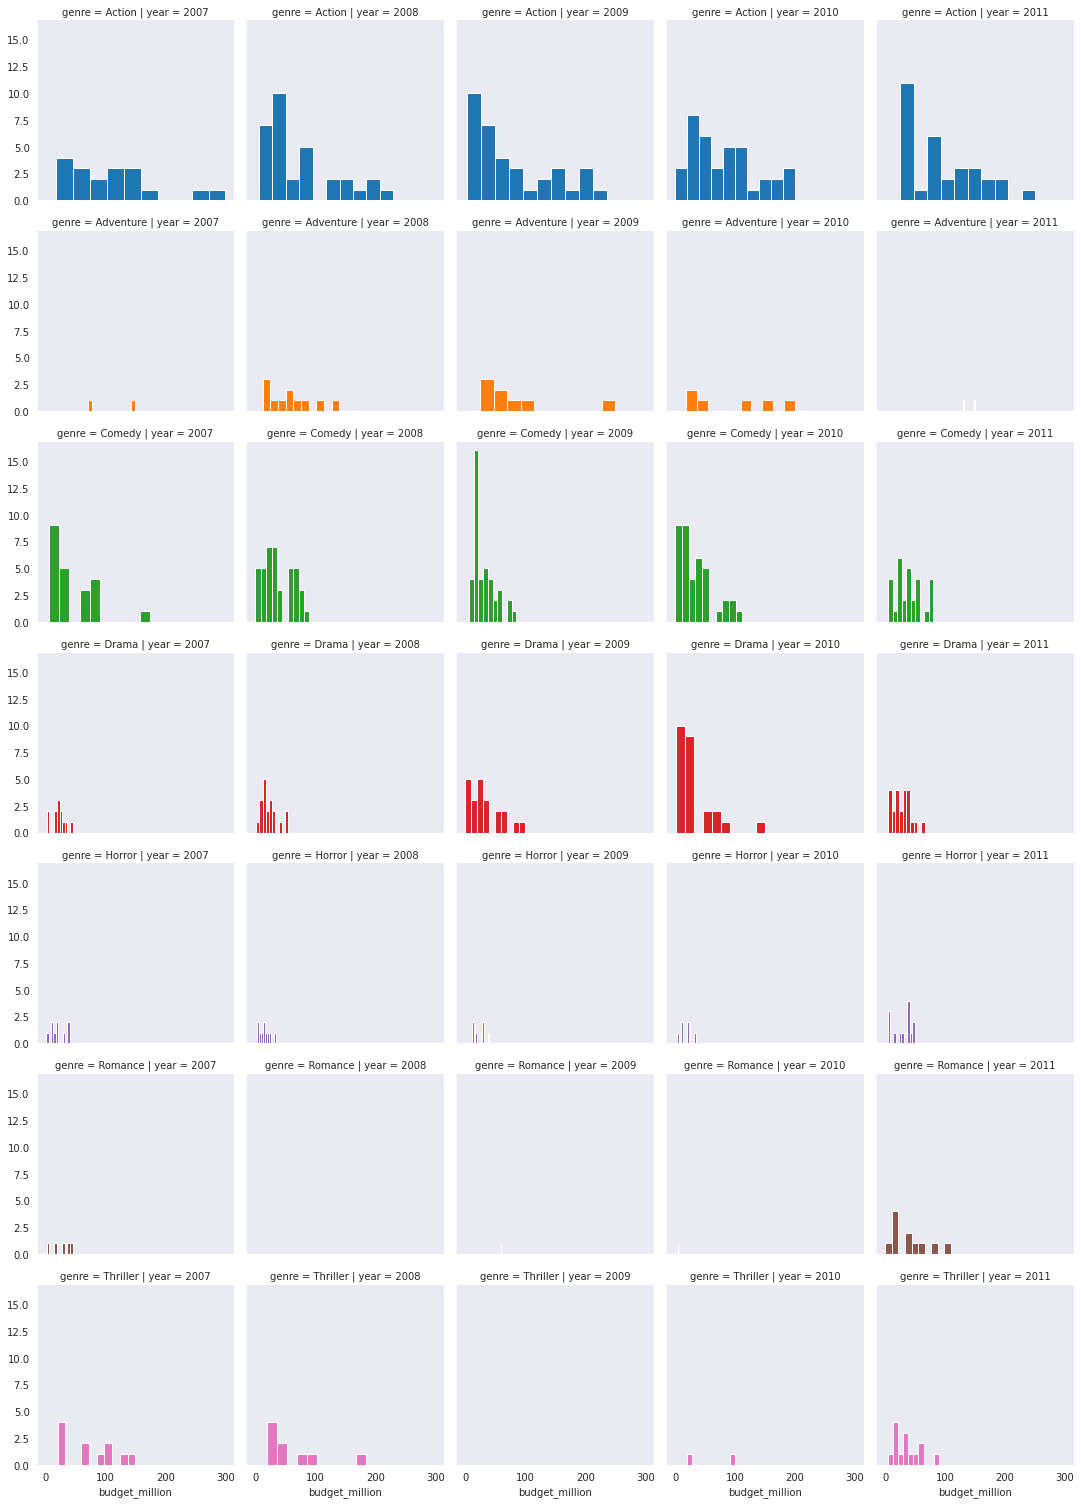

In [ ]:
fg = sns.FacetGrid(movies, row='genre', col='year', hue='genre')
fg = fg.map(plt.hist, 'budget_million')

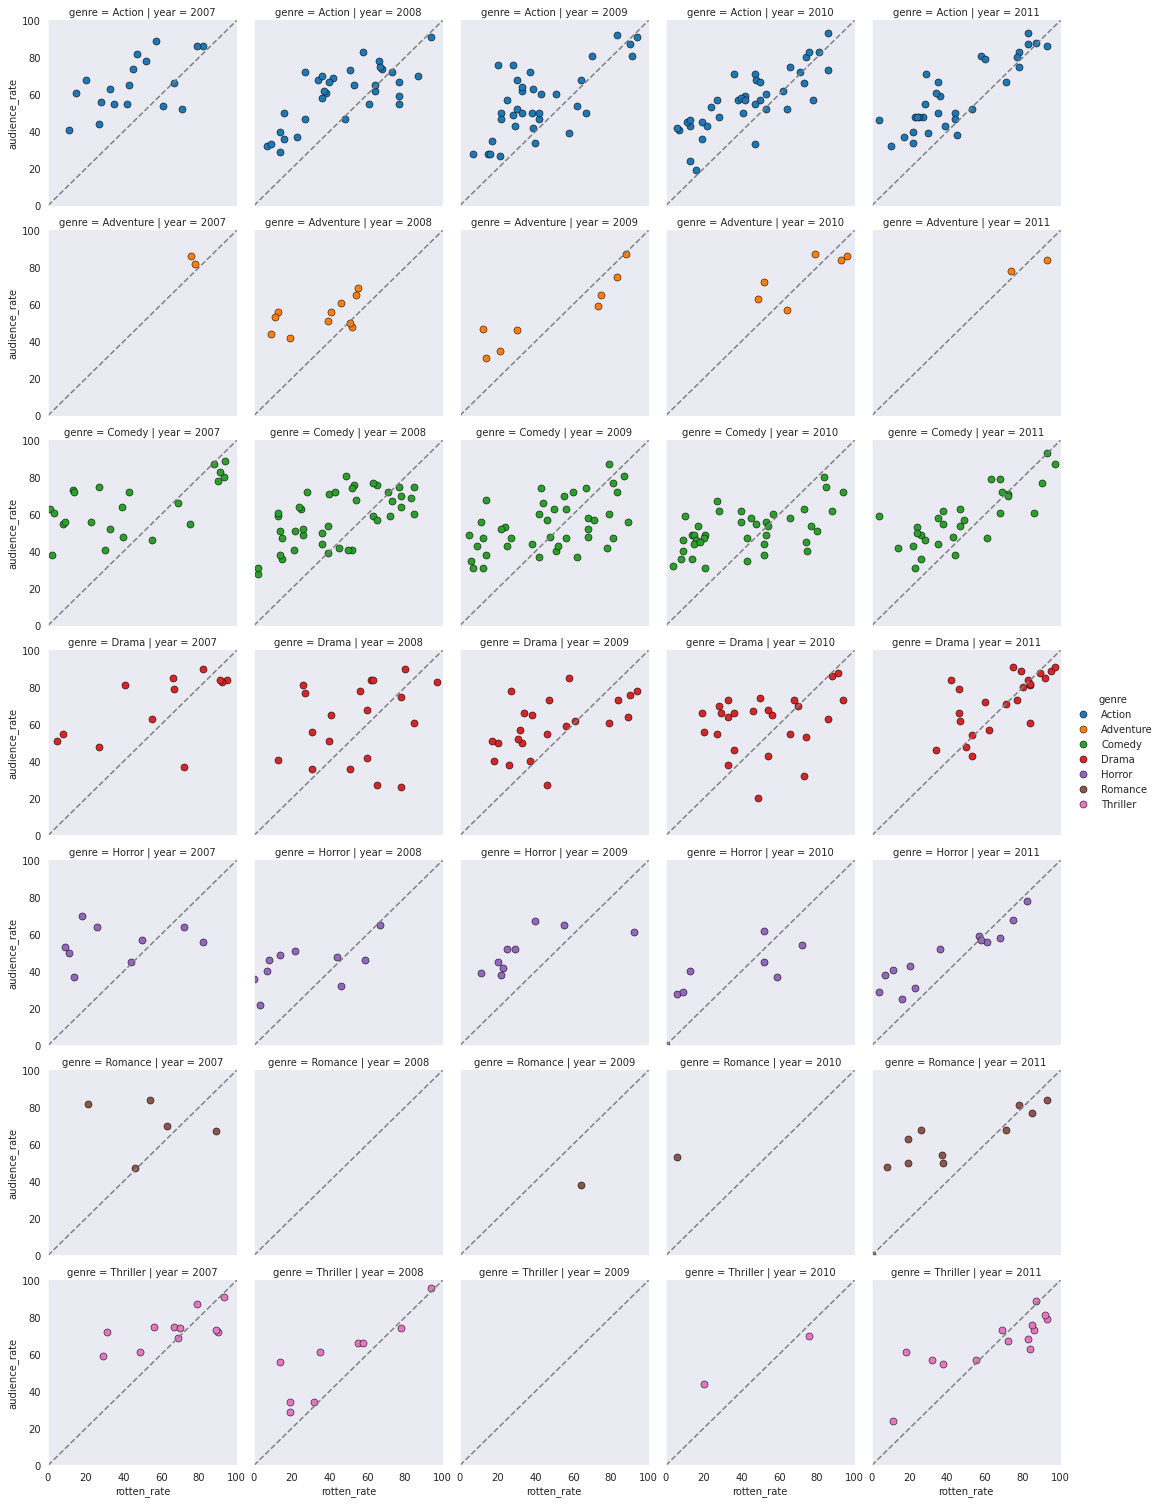

In [ ]:
# control axes and add diagonals to compare rating parameters
fg = sns.FacetGrid(movies, row='genre', col='year', hue='genre')

kws = {'s': 50, 'edgecolor': 'black', 'linewidth': 0.5}
fg = fg.map(plt.scatter, 'rotten_rate', 'audience_rate', **kws)
fg.set(xlim=(0,100), ylim=(0,100))

for ax in fg.axes.flat:
    ax.plot((0,100), (0,100), c='grey', ls='--')

fg.add_legend()

---
# Building Styled Dashboard

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From versi

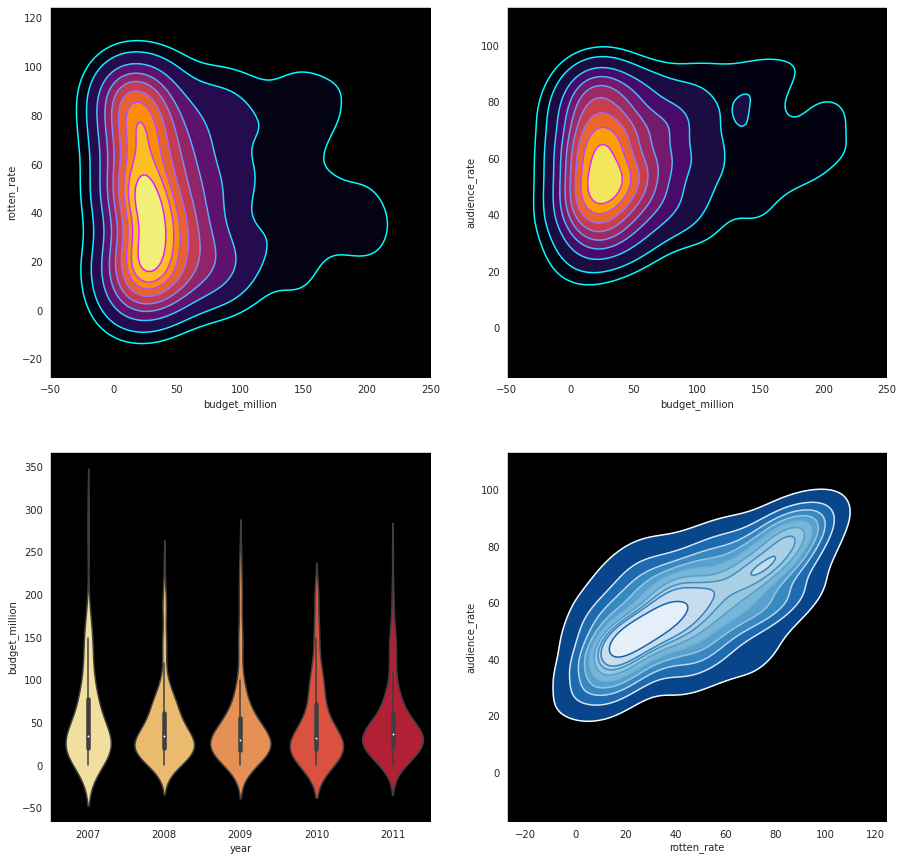

In [ ]:
sns.set_style({'axes.facecolor': 'black'})
f, axes = plt.subplots(2, 2, figsize=(15,15))

# plot 1
k1 = sns.kdeplot(movies.budget_million, movies.rotten_rate, shade=True, shade_lowest=False, 
                 cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies.budget_million, movies.rotten_rate, cmap='cool', ax=axes[0,0])
k1.set(xlim=(-50,250))

# plot 2
k2 = sns.kdeplot(movies.budget_million, movies.audience_rate, shade=True, shade_lowest=False,                               cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.budget_million, movies.audience_rate, cmap='cool', ax=axes[0,1])
k2.set(xlim=(-50,250))

# plot 3
v = sns.violinplot(data=movies, x='year', y='budget_million', palette='YlOrRd', ax=axes[1,0])

# plot 4
k3 = sns.kdeplot(movies.rotten_rate, movies.audience_rate, shade=True, shade_lowest=False, 
                 cmap='Blues_r', ax=axes[1,1])
k3b = sns.kdeplot(movies.rotten_rate, movies.audience_rate, cmap='Blues', ax=axes[1,1])